## Exercise 1: Image Transformation using Filters

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def apply_filter_color(image, kernel):
    h, w, c = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w), (0,0)), mode = 'reflect')
    output = np.zeros_like(image, dtype = np.float32)

    kernel_flipped = np.flipud(np.fliplr(kernel))

    for ch in range(c):
        for i in range(h):
            for j in range(w):
                region = padded[i:i+kh, j:j+kw, ch]
                output[i, j, ch] = np.sum(region * kernel_flipped)

    return np.clip(output, 0, 255).astype(np.uint8)

In [68]:
kernels = {
    "Original": np.array([[1]]),

    "Blur (Box)": (1/9) * np.array([
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]
    ]),

    "Gaussian Blur (3x3)": (1/16) * np.array([
        [1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]
    ]),

    "Sharpen": (1/1) * np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ]),

    "Edge Detection (Sobel X)": (1/1) * np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ]),

    "Edge Detection (Sobel Y)": np.array([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]
    ]),

    "Emboss": np.array([
        [-2, -1, 0],
        [-1, 1, 1],
        [0, 1, 2]
    ]),

    "Line Detection (Vertical)": np.array([
        [-1, 2, -1],
        [-1, 2, -1],
        [-1, 2, -1]
    ]),

    "Line Detection (Horizontal)": np.array([
        [-1, -1, -1],
        [2, 2, 2],
        [-1, -1, -1]
    ])
}

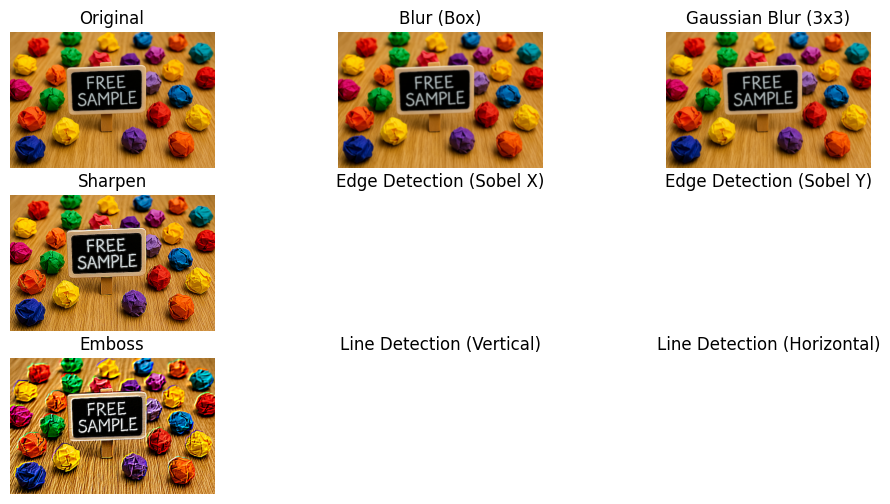

In [69]:
image_path = "data/paperballs.png"
img = Image.open(image_path)
img_np = np.array(img)

plt.figure(figsize=(12, 6))
for i, (name, kernel) in enumerate(kernels.items()):
    filtered_img = apply_filter_color(img_np, kernel)
    plt.subplot(3, 3, i+1)
    plt.title(name)
    plt.imshow(filtered_img)
    plt.axis("off")

plt.show()

## Exercise 2: Template Matching

In [70]:
import pickle
import pandas as pd

with open('data/mnist.pkl', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding= 'latin1')

In [71]:
train_x, train_y = train_set
test_x, test_y = test_set

train_x = pd.DataFrame(train_x)
train_y = pd.DataFrame(train_y, columns= ['label'])
test_x = pd.DataFrame(test_x)
test_y = pd.DataFrame(test_y, columns= ['label'])

li = []
li = np.array([np.array([1 if pix != 0 else 0 for pix in train_x.iloc[i, :]]) for i in range(len(train_x))])

bin_train_x = pd.DataFrame(li)
bin_train = pd.concat([bin_train_x, train_y], axis=1)
print('binary train data shape: ', bin_train.shape)

binary train data shape:  (50000, 785)


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 

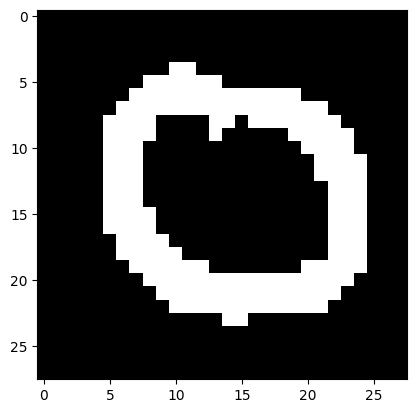

In [72]:
image0 = bin_train.iloc[108,:-1].values.reshape((28, 28)) # 1000 -> 0
print(image0)
plt.imshow(image0, cmap='gray')

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 

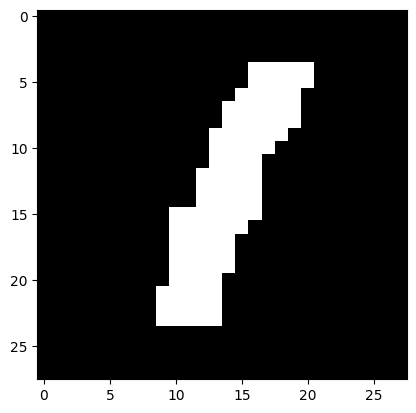

In [73]:
image1 = li[105, :].reshape((28, 28)) # 1000 -> 0, 8 -> 1
print(image1)
plt.imshow(image1, cmap='gray')

In [74]:
df0 = pd.DataFrame(li[108, :])
df1 = pd.DataFrame(li[105, :])

In [75]:
li = []
li = np.array([np.array([1 if pix != 0 else 0 for pix in test_x.iloc[i, :]]) for i in range(len(test_x))])

bin_test_x = pd.DataFrame(li)
bin_test = pd.concat([bin_test_x, test_y], axis=1)
print('binary test data shape: ', bin_test.shape)

binary test data shape:  (10000, 785)


In [76]:
train_0_data = bin_train[train_y['label'] == 0]
train_1_data = bin_train[train_y['label'] == 1]
train_01_data = pd.concat([train_0_data, train_1_data])

test_0_data = bin_test[test_y['label'] == 0]
test_1_data = bin_test[test_y['label'] == 1]
test_01_data = pd.concat([test_0_data, test_1_data])

print("train binary data shape: ", train_01_data.shape)
print("test binary data shape: ", test_01_data.shape)

# plot_images(train_0_data, train_1_data, )

train binary data shape:  (10610, 785)
test binary data shape:  (2115, 785)


In [77]:
match_zero = []
match_one = []
label_result = []
for i in range(len(test_01_data)):
    test_image = test_01_data.iloc[i, :-1]
    match_zero_result = df0.iloc[:, 0] & test_image
    match_one_result = df1.iloc[:, 0] & test_image

    match_zero.append(match_zero_result)
    match_one.append(match_one_result)

    sum0 = sum(match_zero_result)
    sum1 = sum(match_one_result)

    if sum0 > sum1:
        label_result.append(0)
    else:
        label_result.append(1)

In [78]:
def plot_images(train_zero, train_one, match_zero, match_one, test_data):
    fig, axs = plt.subplots(1, 5, figsize=(15, 3))

    axs[0].imshow(train_zero.values.reshape(28, 28), cmap='gray')
    axs[0].set_title('label=0 train data')

    axs[1].imshow(train_one.values.reshape(28, 28), cmap='gray')
    axs[1].set_title('label=1 train data')

    axs[2].imshow(test_data[:-1].values.reshape(28, 28), cmap='gray')
    axs[2].set_title('test data')

    axs[3].imshow(match_zero.values.reshape(28, 28), cmap='gray')
    axs[3].set_title('test ∩ label=0')

    axs[4].imshow(match_one.values.reshape(28, 28), cmap='gray')
    axs[4].set_title('test ∩ label=1')

    for ax in axs:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

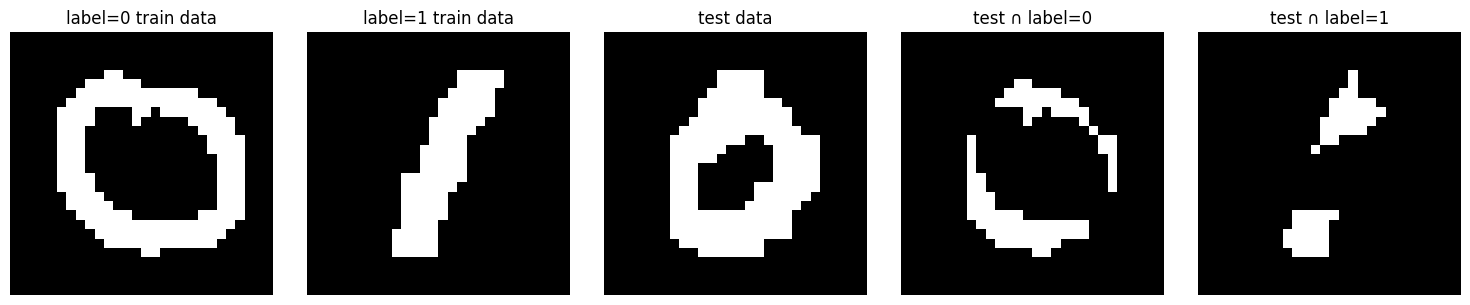

match_zero =  86
match_one =  52
classification decision: 0


In [79]:
plot_images(df0.iloc[:, 0], df1.iloc[:, 0], match_zero[0], match_one[0], test_01_data.iloc[0,:])
print("match_zero = ", sum(match_zero[0]))
print("match_one = ", sum(match_one[0]))

if sum(match_zero[0]) > sum(match_one[0]):
    print("classification decision: 0")
else:
    print("classification decision: 1")

In [80]:
correct = test_01_data['label'] == label_result
correct_num = correct.sum()
print("# correct predictions: ", correct_num)
print("total # of test samples: ", len(label_result))
print("accuracy = ", correct_num/len(label_result))

# correct predictions:  2060
total # of test samples:  2115
accuracy =  0.9739952718676123


## Exercise 3: Visualization of PCA Reconstruction

In [81]:
image_path = "data/paperballs.png"
img = Image.open(image_path).convert('L')
img_np = np.array(img)

# TODO: Center the image data
# Hint: subtract the mean of each column
img_mean = np.mean(img_np, axis = 0)
img_centered = img_np - img_mean

# TODO: Perform PCA
# Hint: Set rowvar=False to treat rows as observations
cov_matrix = np.cov(img_centered.T)
eig_val, eig_vec = np.linalg.eig(cov_matrix)

# TODO: Sort the components by importance (descending eigenvalue)
# Hint: Use np.argsort and reverse
idx = np.argsort(eig_val)[::-1]
eig_val = eig_val[idx]
eig_vec = eig_vec[:, idx]

components = [1, 5, 10, 25, 40, 50]
reconstructed = []

for k in components:
    # TODO: Use top-k eigenvectors
    top_vecs = eig_vec[:, :k].real

    # TODO: Project the centered image onto the top-k components
    proj = img_centered.dot(top_vecs)

    # TODO: Reconstruct the image using the projection and add back the mean
    recon = top_vecs.dot(proj.T).T + img_mean

    reconstructed.append(recon)

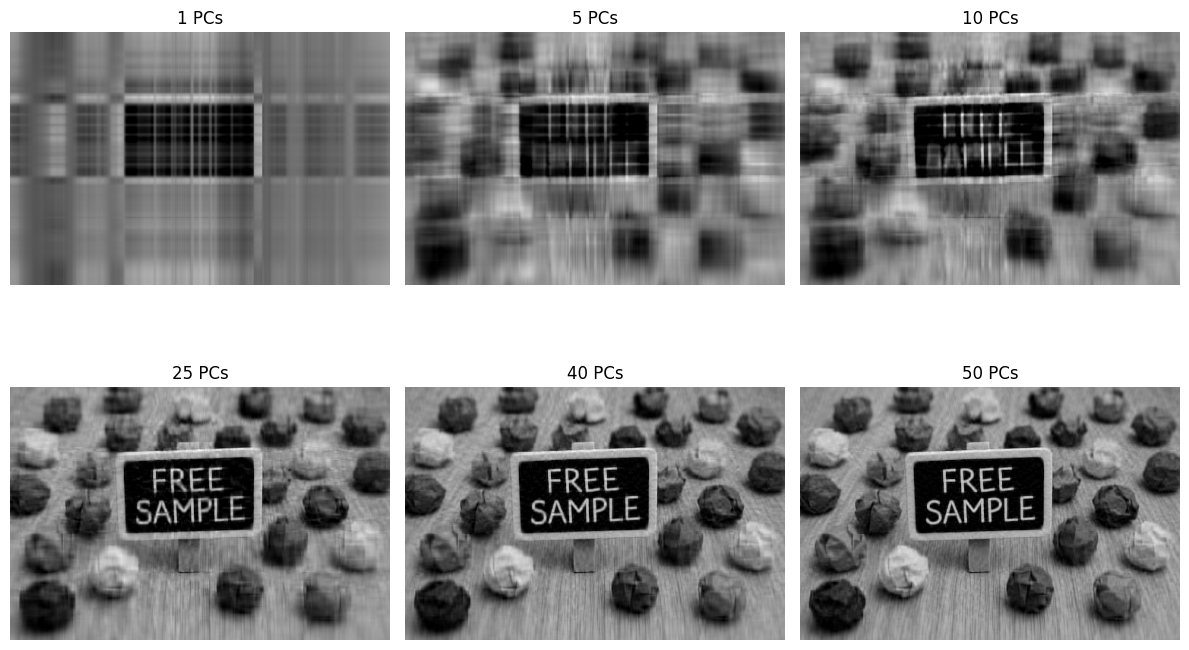

In [82]:
# Plotting in 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()
for ax, rec_img, k in zip(axes, reconstructed, components):
    ax.imshow(rec_img, cmap='gray', vmin=0, vmax=255)
    ax.set_title(f"{k} PCs")
    ax.axis("off")

plt.tight_layout()
plt.show()